In [1]:
import emoji
import pandas as pd
import numpy as np

In [2]:
emoji_map=pd.read_csv('Mapping.csv',header=None)
emojiMap=emoji_map[1:]
emojiMap.head()
emoticons=emojiMap[1].values
emoticonsValues=emojiMap[2].values
emoji_dict={}
for (emoji,number) in zip(emoticons,emoticonsValues):
    emoji_dict[float(number)]=emoji
print(emoji_dict[0])

😜


In [3]:
for e in emoji_dict.values():
    print(e)

😜
📸
😍
😂
😉


In [4]:
fullData = pd.read_csv("clean_data_2500.csv", header=None)

In [5]:
fullData.head()

,0,1
0,TEXT,Label
1,Vacation wasted vacation2017 photobomb ti...,0
2,Another day another shoe picture I love all t...,0
3,confession i took this gig so i could come...,0
4,You re welcome ladies TIM soul2soultour201...,0


In [6]:
fullData = fullData.drop(0)
fullData.head()

,0,1
1,Vacation wasted vacation2017 photobomb ti...,0
2,Another day another shoe picture I love all t...,0
3,confession i took this gig so i could come...,0
4,You re welcome ladies TIM soul2soultour201...,0
5,Just wanted to annoy Tricia In N Out Burger...,0


In [7]:
fullData[0] = fullData[0].str.replace(r'\d+', '', regex=True)
fullData.head()

,0,1
1,Vacation wasted vacation photobomb tired ...,0
2,Another day another shoe picture I love all t...,0
3,confession i took this gig so i could come...,0
4,You re welcome ladies TIM soulsoultour ti...,0
5,Just wanted to annoy Tricia In N Out Burger...,0


In [8]:
TextData=fullData[0].values
LabelData=fullData[1].values

In [9]:
TextData[0]

'Vacation wasted    vacation  photobomb  tired  vacationwasted  mcgar  miami   Port of  '

In [10]:
LabelData[:5]

array(['0', '0', '0', '0', '0'], dtype=object)

In [11]:


# for sent,label in zip(TextData,LabelData):
#     print(sent,label)
#     print(emoji.emojize(emoji_dict[str(label)]))

In [12]:
TextData.shape


(2500,)

In [13]:
LabelData.shape

(2500,)

# Word Embeddings

In [14]:
file = open("glove.6B.100d.txt", encoding='utf8')


In [15]:
embedding_index = {}
for line in file:
    
    values = line.split()
    word = values[0]
    embedValues = np.array(values[1:], dtype='float')
    
    embedding_index[word] = embedValues

In [19]:
# embedding_index['not']

In [16]:
embedding_index['vacation'].shape

(100,)

## Get maximum length of a sentence

In [17]:
max_word_count = 0  # Initialize the maximum word count

for text in TextData:
    words = text.split()  # Split the text into words
    word_count = len(words)  # Calculate the word count
    
    if word_count > max_word_count:
        max_word_count = word_count  # Update the maximum word count

print("Maximum word count:", max_word_count)

Maximum word count: 31


In [18]:
def get_embedding_output(X):
    vocab_size=0
    maxLen = 31
    embedding_output = np.zeros((len(X), maxLen, 100))
    
    for ix in range(len(X)):
        X[ix] = X[ix].split()
        for ij in range(len(X[ix])):
            word = X[ix][ij].lower()
            if word in embedding_index:
                embedding_output[ix][ij] = embedding_index[word]
#             embedding_output[ix][ij] = embedding_index[X[ix][ij].lower()]
            vocab_size = vocab_size+1
    return embedding_output,vocab_size

In [19]:
def get_embedding_for_testing(X):
    file = open("glove.6B.100d.txt", encoding='utf8')
    embedding_index = {}
    for line in file:
        values = line.split()
        word = values[0]
        embedValues = np.array(values[1:], dtype='float')

        embedding_index[word] = embedValues
    maxLen = 31
    embedding_output = np.zeros((len(X), maxLen, 100))
    
    for ix in range(len(X)):
        X[ix] = X[ix].split()
        
        for ij in range(len(X[ix])):
            word = X[ix][ij].lower()
            if word in embedding_index:
                embedding_output[ix][ij] = embedding_index[word]
    return embedding_output

In [20]:
TextDataEmbeddings,vocab_size = get_embedding_output(TextData)
print(vocab_size)

28970


In [21]:
TextDataEmbeddings.shape

(2500, 31, 100)

In [22]:
from keras.utils import to_categorical

LabelData = to_categorical(LabelData)

In [23]:
LabelData

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(TextDataEmbeddings, LabelData, test_size=0.2, random_state=32)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (2000, 31, 100)
Training y Dim  (2000, 5)
Test X Dim  (500, 31, 100)
Test y Dim  (500, 5)


# Model Building

In [52]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN,Embedding,GlobalMaxPool1D
from keras.layers import Bidirectional, LeakyReLU,Activation

In [53]:
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences= True )))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(units = 64)))
model.add(Dropout(0.5))

# model.add(GlobalMaxPool1D())
# model.add(Dropout(0.5))
# model.add(Dense(units= 64))
# model.add(LeakyReLU(alpha=0.05))

model.add(Dense(units= 10, activation='tanh'))

model.add(Dense(units= 5, activation= 'softmax'))
# # model.summary()

# model.add(Bidirectional(LSTM(80,return_sequences=True)))
# # model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(80)))
# # model.add(GlobalMaxPool1D())
# model.add(Dropout(0.5))
# model.add(Dense(64, activation="tanh"))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation="softmax"))



# model = Sequential()
# model.add(LSTM(100,return_sequences = True))
# model.add(Dropout(0.5))
# model.add(LSTM(128 , return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(5))
# model.add(Activation('softmax'))
# model.summary()

In [54]:
# model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=3,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [56]:
# model.evaluate(X_test, y_test, batch_size=batch_size)

In [57]:
# model.evaluate(X_train, y_train, batch_size=batch_size)

In [58]:
from sklearn.model_selection import KFold
# from tensorflow.keras.callbacks import ModelCheckpoint
# checkpoint = ModelCheckpoint("bilstm_model.h5", monitor='loss', verbose=1, save_best_only=True)
k = 25
kf = KFold(n_splits=k)
acc_scores = []
for train_index, test_index in kf.split(TextDataEmbeddings):
    X_train, X_test = TextDataEmbeddings[train_index], TextDataEmbeddings[test_index]
    Y_train, Y_test = LabelData[train_index], LabelData[test_index]
    
    #run the model for every fold
    model.fit(X_train, Y_train , shuffle=True, batch_size=16, epochs=20, validation_data=(X_test, Y_test) ,callbacks=[early_stop] )
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    acc_scores.append(acc)
    model.save('new_model_percent.h5')
    print('Validation accuracy:', acc)

Epoch 1/20
154/154 [==============================] - 26s 79ms/step - loss: 1.5716 - accuracy: 0.2771 - val_loss: 1.7363 - val_accuracy: 0.0200
Epoch 2/20
154/154 [==============================] - 6s 38ms/step - loss: 1.4927 - accuracy: 0.3453 - val_loss: 1.7118 - val_accuracy: 0.0600
Epoch 3/20
154/154 [==============================] - 6s 39ms/step - loss: 1.4477 - accuracy: 0.3878 - val_loss: 1.6721 - val_accuracy: 0.0800
Epoch 4/20
154/154 [==============================] - 7s 47ms/step - loss: 1.4059 - accuracy: 0.4069 - val_loss: 1.5264 - val_accuracy: 0.2000
Epoch 5/20
154/154 [==============================] - 7s 44ms/step - loss: 1.3579 - accuracy: 0.4310 - val_loss: 1.5599 - val_accuracy: 0.3000
Epoch 6/20
154/154 [==============================] - 5s 36ms/step - loss: 1.3217 - accuracy: 0.4612 - val_loss: 1.5304 - val_accuracy: 0.2800
Epoch 7/20
154/154 [==============================] - 6s 36ms/step - loss: 1.2787 - accuracy: 0.4763 - val_loss: 1.4943 - val_accuracy: 0.220

Epoch 3/20
154/154 [==============================] - 6s 37ms/step - loss: 0.0427 - accuracy: 0.9902 - val_loss: 0.0428 - val_accuracy: 0.9800
Epoch 4/20
154/154 [==============================] - 6s 36ms/step - loss: 0.0288 - accuracy: 0.9931 - val_loss: 0.0452 - val_accuracy: 0.9800
Epoch 4: early stopping
Validation accuracy: 0.9800000190734863
Epoch 1/20
154/154 [==============================] - 6s 40ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 2/20
154/154 [==============================] - 6s 39ms/step - loss: 0.0884 - accuracy: 0.9735 - val_loss: 0.0803 - val_accuracy: 0.9600
Epoch 3/20
154/154 [==============================] - 6s 39ms/step - loss: 0.1255 - accuracy: 0.9653 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 4/20
154/154 [==============================] - 6s 39ms/step - loss: 0.1130 - accuracy: 0.9637 - val_loss: 0.0857 - val_accuracy: 0.9800
Epoch 4: early stopping
Validation accuracy: 0.9800000190734863
Epoch 1/20
154

154/154 [==============================] - 5s 33ms/step - loss: 0.0445 - accuracy: 0.9890 - val_loss: 5.4210e-04 - val_accuracy: 1.0000
Epoch 6/20
154/154 [==============================] - 5s 33ms/step - loss: 0.0172 - accuracy: 0.9959 - val_loss: 5.6657e-04 - val_accuracy: 1.0000
Epoch 6: early stopping
Validation accuracy: 1.0
Epoch 1/20
154/154 [==============================] - 5s 34ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 5.4555e-04 - val_accuracy: 1.0000
Epoch 2/20
154/154 [==============================] - 5s 34ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/20
154/154 [==============================] - 5s 34ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/20
154/154 [==============================] - 5s 35ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4: early stopping
Validation accuracy: 1.0
Epoch 1/20
154/154 [=======================

154/154 [==============================] - 5s 34ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/20
154/154 [==============================] - 5s 35ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 5/20
154/154 [==============================] - 5s 35ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 6/20
154/154 [==============================] - 5s 35ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6: early stopping
Validation accuracy: 1.0
Epoch 1/20
154/154 [==============================] - 5s 35ms/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 2.9718e-04 - val_accuracy: 1.0000
Epoch 2/20
154/154 [==============================] - 5s 35ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 3.2591e-04 - val_accuracy: 1.0000
Epoch 3/20
154/154 [==============================] - 6s 41ms/step - loss: 0.0141 - accuracy: 0.

In [59]:
avg_acc = np.mean(acc_scores)
print('Average validation accuracy:', avg_acc)

Average validation accuracy: 0.9568000048398971


In [60]:
model.evaluate( TextDataEmbeddings, LabelData,batch_size=64)

40/40 [==============================] - 1s 26ms/step - loss: 0.0019 - accuracy: 0.9992


[0.0018745956476777792, 0.9991999864578247]

# Custom Example Prediction

In [26]:
def getCustomTextOutput(x_query):
    embedding_x_query = []

    for w in x_query.split():
        emb = embedding_index[w]
        embedding_x_query.append(emb)
        
    embedding_x_query = np.array(embedding_x_query)
    
    if embedding_x_query.shape[0]:
        embedding_x_query = np.vstack((embedding_x_query , np.zeros((10 - len(x_query.split()), 100))))
    
    embedding_x_query = embedding_x_query.reshape(1, 10, 100)
    
    p = model.predict(embedding_x_query)
    p = np.argmax(p,axis=1)
    print(p[0])
#     print("Given Sentence: ",x_query,"\nPredicted Emoji: ",emoji.emojize(emoji_dict[str(p[0])]))
    print("Given Sentence: ",x_query,"\nPredicted Emoji: ",emoji_dict[p[0]])

In [27]:
x_query = input().lower() 

i love you


In [28]:
getCustomTextOutput(x_query)

ValueError: in user code:

    File "C:\Users\Arafat Hossain Anik\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Arafat Hossain Anik\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Arafat Hossain Anik\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Arafat Hossain Anik\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\Arafat Hossain Anik\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Arafat Hossain Anik\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_73" is incompatible with the layer: expected shape=(None, 31, 100), found shape=(None, 10, 100)


# Load saved Model

In [25]:
from tensorflow.keras.models import load_model

# Load the model and tokenizer
model = load_model('model_85_percent.h5')
model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_110 (Bidirect  (None, 31, 128)          84480     
 ional)                                                          
                                                                 
 dropout_111 (Dropout)       (None, 31, 128)           0         
                                                                 
 bidirectional_111 (Bidirect  (None, 128)              98816     
 ional)                                                          
                                                                 
 dropout_112 (Dropout)       (None, 128)               0         
                                                                 
 dense_144 (Dense)           (None, 10)                1290      
                                                                 
 dense_145 (Dense)           (None, 5)               

# Test File

In [25]:
test_data =  pd.read_csv("test_data.csv", header=None)

In [26]:
test_data = test_data.drop(0)
# test_data.head()
test_data.head()

,0,1
1,Remember that SideChicks Houston Texas,0
2,cm of snow turned into freezing rain km temp...,0
3,On set today with my pretend date shelliester ...,0
4,team diversed frontliner teamwork thankful ...,0
5,The revolution may not be televised but it da...,0


In [27]:
test_data.columns = ['Text', 'Label']
x_test = test_data['Text'].values
y_test = test_data['Label'].values

In [28]:
x_test.shape

(500,)

In [29]:
test_embeddings = get_embedding_for_testing(x_test)

In [30]:
test_embeddings.shape

(500, 31, 100)

In [31]:
# from keras.utils import to_categorical
y_test = to_categorical(y_test)

In [32]:
y_test.shape

(500, 5)

In [33]:
model.evaluate(test_embeddings, y_test,batch_size=64)

8/8 [==============================] - 7s 43ms/step - loss: 0.9432 - accuracy: 0.8580


[0.9432240128517151, 0.8579999804496765]

In [34]:
model.history.history

{}

## Metric Accuracy

In [48]:
from sklearn.metrics import accuracy_score
pred = model.predict(test_embeddings)
pred=np.argmax(pred,axis=1)
y_true=np.argmax(y_test,axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_true, pred)
# pred=to_categorical(pred)
# pred

print("Testing Accuracy:", accuracy)

16/16 [==============================] - 0s 19ms/step
Testing Accuracy: 0.858


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, pred, average='weighted')
recall = recall_score(y_true, pred, average='weighted')
f1 = f1_score(y_true, pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8645999614420667
Recall: 0.858
F1 Score: 0.8332474352532987


In [785]:
model.save('model_85_percent.h5')

In [786]:
from tensorflow.keras.models import load_model

# Load the model and tokenizer
loaded_model = load_model('model_85_percent.h5')
loaded_model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_110 (Bidirect  (None, 31, 128)          84480     
 ional)                                                          
                                                                 
 dropout_111 (Dropout)       (None, 31, 128)           0         
                                                                 
 bidirectional_111 (Bidirect  (None, 128)              98816     
 ional)                                                          
                                                                 
 dropout_112 (Dropout)       (None, 128)               0         
                                                                 
 dense_144 (Dense)           (None, 10)                1290      
                                                                 
 dense_145 (Dense)           (None, 5)               

In [787]:
loaded_model.evaluate(test_embeddings, y_test,batch_size=64)

8/8 [==============================] - 3s 48ms/step - loss: 0.9432 - accuracy: 0.8580


[0.9432240128517151, 0.8579999804496765]

In [386]:
pred = model.predict(test_embeddings)
pred=np.argmax(pred,axis=1)

16/16 [==============================] - 6s 25ms/step


In [356]:
pred

array([2, 0, 0, 2, 4, 0, 0, 1, 0, 2, 0, 0, 0, 3, 2, 2, 4, 0, 0, 2, 0, 0,
       3, 0, 2, 0, 4, 2, 0, 2, 2, 0, 2, 0, 0, 4, 3, 2, 4, 0, 1, 3, 4, 0,
       2, 1, 2, 3, 1, 0, 3, 2, 0, 0, 4, 2, 0, 0, 0, 0, 0, 1, 4, 0, 1, 4,
       1, 3, 2, 0, 2, 0, 0, 4, 0, 0, 3, 0, 0, 4, 1, 4, 1, 2, 2, 2, 4, 4,
       1, 0, 3, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [357]:
# x_test

In [358]:
y_testing = test_data['Label'].values

In [366]:
y_testing[1]

'0'

In [368]:
count=0
for i in range(len(pred)):
    
    print(" ".join(x_test[i]))
    
#     emote = emoji_dict[str(pred[i])]
#     print('Actual :', emoji.emojize(emoji_dict[str(y_testing[i])]))
#     print('Prediction :',emoji.emojize(emote))
#     if(emoji.emojize(emoji_dict[str(y_testing[i])])==emoji.emojize(emote)):
#         count=count+1
    emote = emoji_dict[pred[i]]
    print('Actual :', emoji_dict[int(y_testing[i])])
    print('Prediction :',emote)
    if(emoji_dict[int(y_testing[i])]==emote):
        count=count+1
print("Total Right :",count,"Among :",y_test.shape[0])

Remember that SideChicks Houston Texas
Actual : 😜
Prediction : 😍
cm of snow turned into freezing rain km tempo run on the treadmill on a good note was able
Actual : 😜
Prediction : 😜
On set today with my pretend date shelliester let s go interracial couple actorslife setlife
Actual : 😜
Prediction : 😜
team diversed frontliner teamwork thankful blessed nofilter Panera Bread
Actual : 😜
Prediction : 😍
The revolution may not be televised but it damn well will be photographed Context On site
Actual : 😜
Prediction : 😉
Chicken Marsala W Bowtie Pasta and Carmelized Broccoli artisticsoulcatering atlanta GA
Actual : 😜
Prediction : 😜
Getting ready for dinner What s your plan for tonight anticatrattoriasd eatlocal
Actual : 😜
Prediction : 😜
my user bio sign by theotherbrennen picture by honeydoart Fort Works Art
Actual : 😜
Prediction : 📸
Ran away from the cold to see my homie Florida Gulf Coast University
Actual : 😜
Prediction : 😜
Thanks jasminedspaulding dragqueen marked lipstick Lipgloss amp Lashes

Actual : 😍
Prediction : 😍
We L VE Handbags Explore designer handbags at STOREa saintlurent Store a
Actual : 😍
Prediction : 😍
This view and that dress Twin Owls Steakhouse at the Black Canyon Inn
Actual : 😍
Prediction : 😍
Could not be happier with how this turned out handlettering
Actual : 😍
Prediction : 😍
Quality Eats UES now open Grilled Nueske s BaconPeanut Butter Jalapeño Jelly nyc
Actual : 😍
Prediction : 😍
It s beginning to look a lot like Christmas ithasbegun ferrisbuellersdayoff Swan Lake
Actual : 😍
Prediction : 😍
these kinds of morning monday workflow mondaymotivation nypd auntie n nephew at nypd user
Actual : 😍
Prediction : 😍
This is what it looks like when someone loves you unconditionally oh Puppy Brother htx
Actual : 😂
Prediction : 😂
RT user this white family was invited to a Black barbecue and i ve never laughed so hard in my life
Actual : 😂
Prediction : 😂
This guy cracks me up Mississippi
Actual : 😂
Prediction : 😂
Sun so blinding lovebug bug South Boston M A
Actual : 😂
Pre

[0.2402234673500061, 0.9103641510009766, 0.9327731132507324, 0.9019607901573181, 0.9747899174690247, 0.9607843160629272, 0.9383753538131714]
[1, 2, 3, 4, 5, 6, 7]


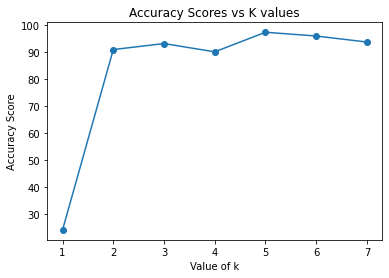

In [369]:
import matplotlib.pyplot as plt

# Assuming acc_scores is a list of accuracy scores for each fold
print(acc_scores)
for i in range (0, len(acc_scores)):
    acc_scores[i]=acc_scores[i]*100
k_values = [i for i in range(1, len(acc_scores)+1)]
print(k_values)

# Plotting the accuracy scores vs k values
plt.plot(k_values, acc_scores, marker='o')
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores vs K values')
plt.show()